In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
df = pd.read_csv('india-news-headlines.csv')

In [14]:
df.head(n=50)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [27]:
from datetime import datetime
df["publish_date"] = pd.to_datetime(df["publish_date"], format='%Y%m%d')

In [33]:
def analyze_polarity(headline):
    result = TextBlob(headline)
    if result.sentiment.polarity > 0:
        return 1
    elif result.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [34]:
df['Result'] = np.array([analyze_polarity(headline) for headline in df['headline_text']])

In [35]:
ositive_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] > 0]
unbiased_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] == 0]
negative_headlines = [ head for index, head in enumerate(df['headline_text']) if df['Result'][index] < 0]

In [36]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(df['headline_text'].values,df['Result'].values,test_size=0.2)
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ',s).split()
vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)


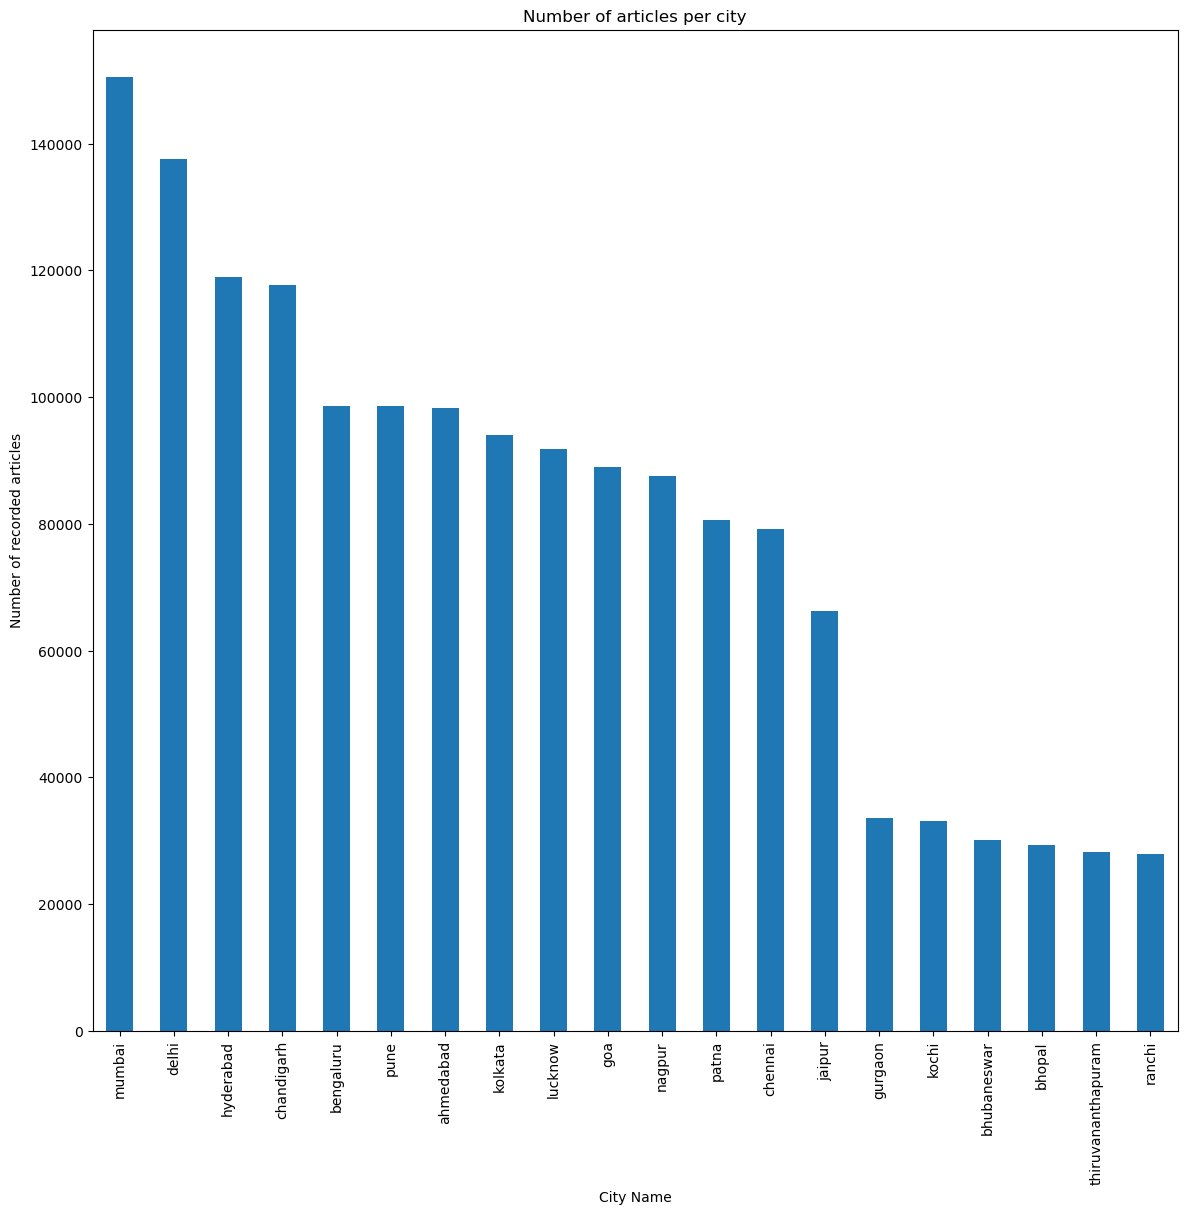

In [18]:
def label_plot(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
data_cities = df[df['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
data_cities['city_name'] = data_cities.headline_category.str[5:]
city_list = data_cities['city_name'].unique().tolist()
#Bar chart of covrage by cities in descending order
grp_city = data_cities.groupby(['city_name'])['headline_text'].count().nlargest(20)
ts = pd.Series(grp_city)
ts.plot(kind='bar', figsize=(14,13))
label_plot('City Name', 'Number of recorded articles', 'Number of articles per city')
plt.show()

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adaboost= AdaBoostClassifier(n_estimators=150)
adaboost.fit(tf_train,Y_train)
pred=adaboost.predict(tf_test)
accuracy=(pred == Y_test).mean()
print(accuracy)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.9220234622579753
[[ 66715  19012   3221]
 [  1595 502028   2542]
 [  2906  27662 104513]]
              precision    recall  f1-score   support

          -1       0.94      0.75      0.83     88948
           0       0.91      0.99      0.95    506165
           1       0.95      0.77      0.85    135081

    accuracy                           0.92    730194
   macro avg       0.93      0.84      0.88    730194
weighted avg       0.92      0.92      0.92    730194



<Axes: >

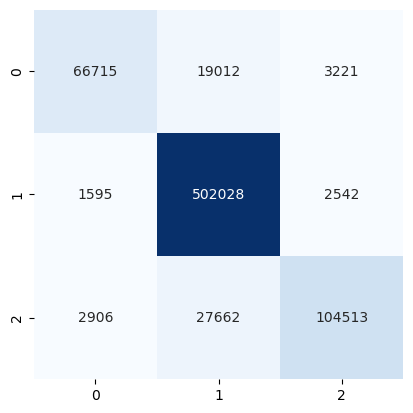

In [38]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, pred), square=True, annot=True, cmap='Blues', fmt='d', cbar=False)